In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

from mlp import FashionMLP

%matplotlib inline

# Helper functions

In [2]:
def plot_training(history: dict) -> None:
    """Plot the training losses.

    Args:
        history (dict): Dictionary ontaining test and validation loss for each epoch.
    """
    fig, ax = plt.subplots()
    ax.plot(history["epoch"], history["train_loss"], label="train_loss")
    ax.plot(history["epoch"], history["val_loss"], label="val_loss")

    ax.set_title("Training")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("loss")    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.legend()
    plt.show()

# Download and prepare data

In [3]:
BATCH_SIZE = 128

In [4]:
# Download train and test set
train = FashionMNIST("data", train=True, download=True, transform=transforms.ToTensor())
test = FashionMNIST("data", train=False, download=True, transform=transforms.ToTensor())

# Seperate validation set
train, val = random_split(train, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

In [5]:
train_loader = DataLoader(train, BATCH_SIZE, shuffle=True, generator=torch.Generator().manual_seed(42))
val_loader = DataLoader(val, BATCH_SIZE)
test_loader = DataLoader(test, BATCH_SIZE)

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Multi Layer Perceptron

Epoch  1/50: train_loss=1.703076, val_loss=1.640401, val_accuracy=0.8209
Epoch  2/50: train_loss=1.635568, val_loss=1.652773, val_accuracy=0.8071
Epoch  3/50: train_loss=1.618384, val_loss=1.611963, val_accuracy=0.8477
Epoch  4/50: train_loss=1.611704, val_loss=1.621364, val_accuracy=0.8391
Epoch  5/50: train_loss=1.607455, val_loss=1.621161, val_accuracy=0.8394
Epoch  6/50: train_loss=1.600113, val_loss=1.599857, val_accuracy=0.8602
Epoch  7/50: train_loss=1.599803, val_loss=1.600104, val_accuracy=0.8615
Epoch  8/50: train_loss=1.591994, val_loss=1.609252, val_accuracy=0.8512
Epoch  9/50: train_loss=1.590691, val_loss=1.597289, val_accuracy=0.8639
Epoch 10/50: train_loss=1.592008, val_loss=1.607395, val_accuracy=0.8534
Epoch 11/50: train_loss=1.588760, val_loss=1.605659, val_accuracy=0.8550
Epoch 12/50: train_loss=1.584147, val_loss=1.588257, val_accuracy=0.8733
Epoch 13/50: train_loss=1.585562, val_loss=1.590264, val_accuracy=0.8704
Epoch 14/50: train_loss=1.584198, val_loss=1.595380

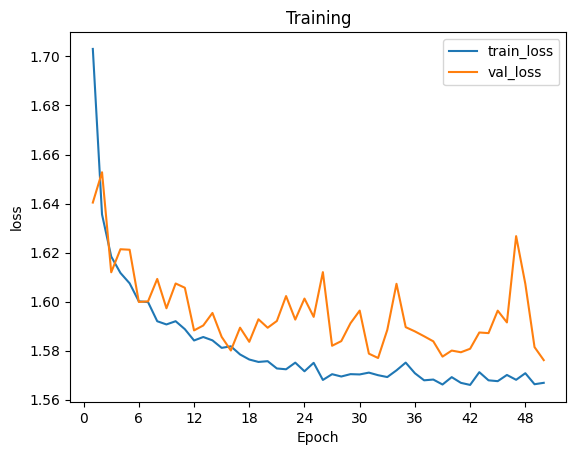

In [8]:
mlp = FashionMLP(hidden_dims=(512, 512)) 
history = mlp.train(train_loader, val_loader, 50)
plot_training(history)

Prediction: Bag, Truth: Bag


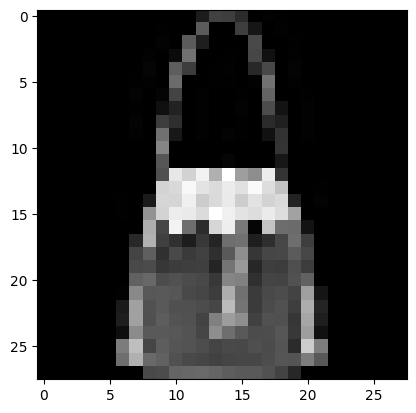

In [18]:
# Predict random observation from validation set
idx = torch.randint(0, len(val_loader), (1, ))
X, y = val_loader.dataset[idx]
pred = mlp.predict(X)[0].item()
print(f"Prediction: {class_names[pred]}, Truth: {class_names[y]}")
plt.imshow(torch.squeeze(X, dim=0), cmap="gray");

# Convolutional Neural Network

In [10]:
# TODO

# Vision Transformer

In [11]:
# TODO

# Summary

In [12]:
# TODO